# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

   Year_Birth   Education Marital_Status   Income  Kidhome  Recency  MntWines  \
0        1957  Graduation         Single  58138.0        0       58       635   
1        1954  Graduation         Single  46344.0        1       38        11   
2        1965  Graduation       Together  71613.0        0       26       426   
3        1984  Graduation       Together  26646.0        1       26        11   
4        1981         PhD        Married  58293.0        1       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumStorePurchases  NumWebVisitsMonth  Complain  WebPurchases  
0            88         

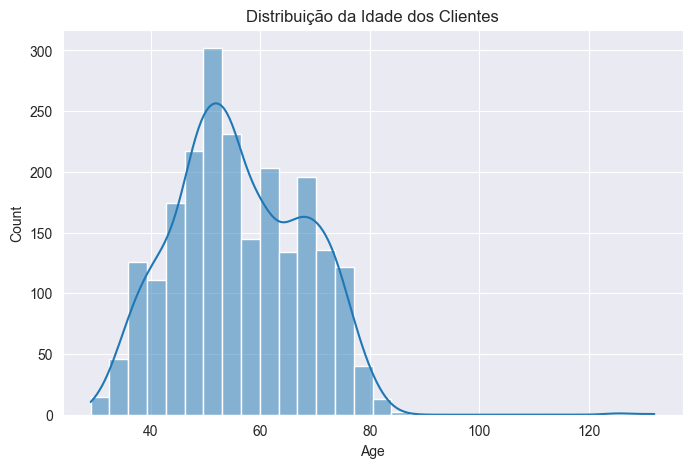

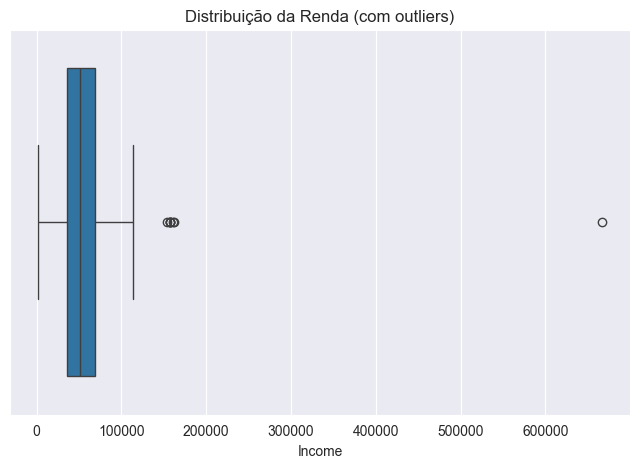

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

base = pd.read_csv('marketing_campaign.csv', delimiter=';')

# Visualizar primeiras linhas
print(base.head())
print(base.info())
print(base.columns)

# Verificar valores ausentes
print(base.isnull().sum())

# Excluir valores nulos na renda
base = base.dropna(subset=['Income'])

# Criar feature "Idade"
base['Age'] = 2025 - base['Year_Birth']

# Criar feature "Total_Gasto"
base['Total_Spent'] = base[['MntWines','MntFruits','MntMeatProducts',
                            'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

# Criar variável alvo: se o cliente comprou no site (1 se WebPurchases > 0, senão 0)
base['Target'] = np.where(base['WebPurchases'] > 0, 1, 0)

# Storytelling inicial
plt.figure(figsize=(8,5))
sns.histplot(base['Age'], bins=30, kde=True)
plt.title('Distribuição da Idade dos Clientes')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=base['Income'])
plt.title('Distribuição da Renda (com outliers)')
plt.show()

#A variável alvo que criamos (Target = 1 se o cliente fez pelo menos uma compra online) mostra que uma parcela significativa dos clientes já aderiu ao canal online. No entanto, muitos ainda não compram pelo site.

#Sugestão de Ação:

#Criar campanhas de marketing direcionadas especificamente para esse grupo, destacando a conveniência, a variedade de produtos online e ofertas exclusivas para o canal digital.

#Implementar um programa de incentivo para a primeira compra online (ex.: frete grátis, cupom de desconto).

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








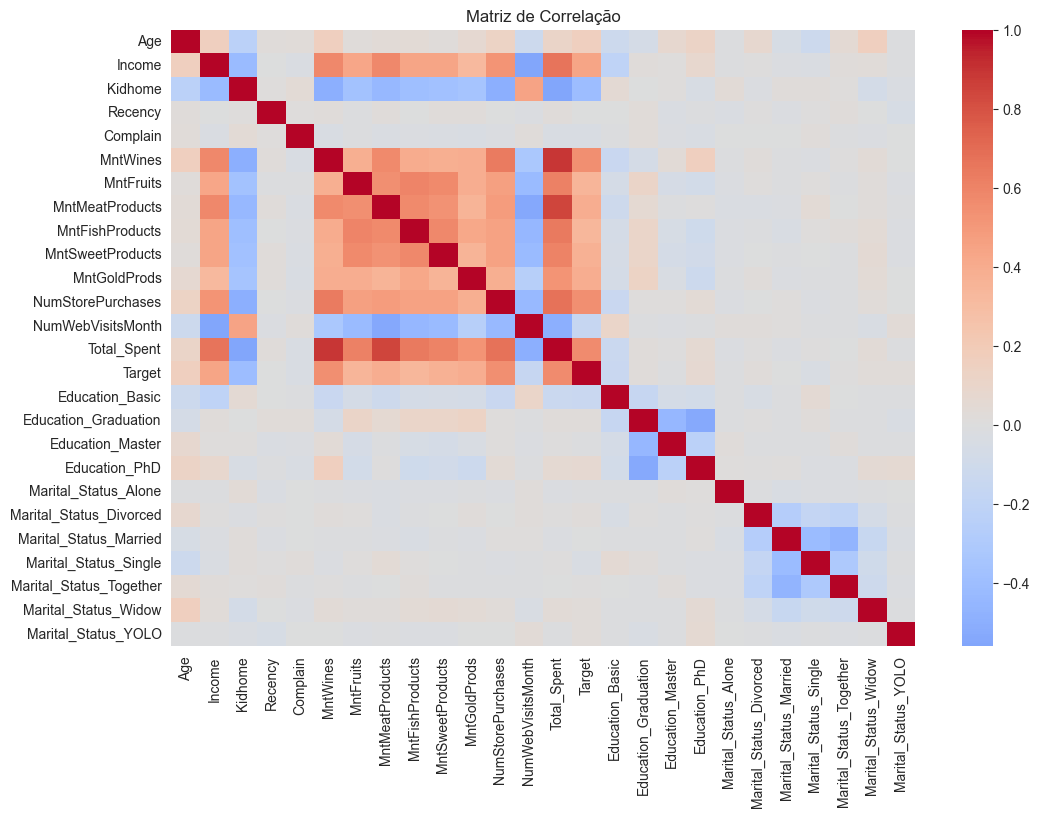

In [10]:
# seu código aqui
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecionar variáveis numéricas e categóricas
categoricas = ['Education','Marital_Status']
numericas = ['Age','Income','Kidhome','Recency','Complain',
             'MntWines','MntFruits','MntMeatProducts','MntFishProducts',
             'MntSweetProducts','MntGoldProds',
             'NumStorePurchases','NumWebVisitsMonth','Total_Spent']

# One-hot encoding das variáveis categóricas
base_encoded = pd.get_dummies(base[categoricas + numericas + ['Target']], drop_first=True)

# Separar X e Y
X = base_encoded.drop('Target', axis=1)
y = base_encoded['Target']

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Padronizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Correlação antes da modelagem
plt.figure(figsize=(12,8))
sns.heatmap(base_encoded.corr(), cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

#A análise de correlação e a distribuição de renda mostram que, como esperado, clientes com maior renda tendem a gastar mais (Total_Spent). A correlação entre Income e Total_Spent é uma das mais fortes da matriz.

#Para o público de alta renda: Criar um programa de fidelidade VIP com benefícios exclusivos (acesso prioritário a lançamentos, descontos progressivos, atendimento personalizado).

#No entanto, a renda não é o único driver! Clientes de renda mais baixa também compram online. Para eles, devemos focar em promoções, descontos agressivos (NumDealsPurchases) e produtos de menor valor (como doces e frutas).


# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [16]:
# seu código aqui
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modelo 1 - Regressão Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Modelo 2 - Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

#Há uma correlação negativa entre o número de visitas ao site (NumWebVisitsMonth) e a quantidade de compras online (WebPurchases). Pode parecer contra-intuitivo, mas significa que existem muitos clientes que visitam o site com frequência mas não finalizam a compra.

#Implementar campanhas de remarketing para usuários que abandonaram o carrinho, oferecendo ajuda ou um incentivo final (ex.: "Parece que você esqueceu algo! Cupom de 5% para finalizar sua compra.").



RandomForestClassifier(n_estimators=200, random_state=42)

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.


=== Regressão Logística ===
Acurácia: 0.8616541353383459
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       329
           1       0.87      0.86      0.86       336

    accuracy                           0.86       665
   macro avg       0.86      0.86      0.86       665
weighted avg       0.86      0.86      0.86       665



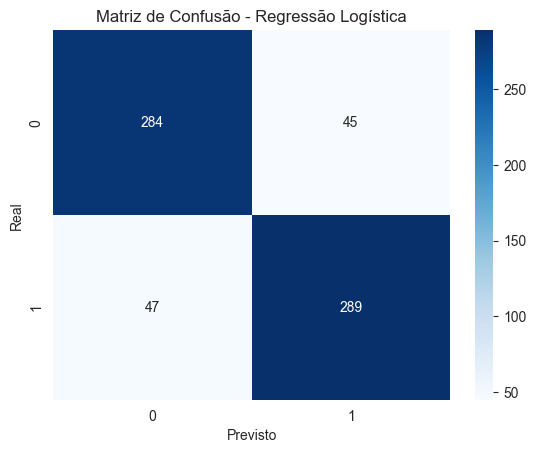


=== Random Forest ===
Acurácia: 0.8616541353383459
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       329
           1       0.87      0.86      0.86       336

    accuracy                           0.86       665
   macro avg       0.86      0.86      0.86       665
weighted avg       0.86      0.86      0.86       665



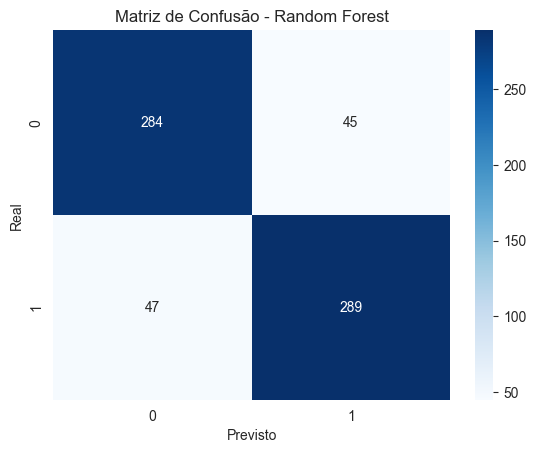

In [15]:
# seu código aqui
def avaliar_modelo(nome, y_true, y_pred):
    print(f"\n=== {nome} ===")
    print("Acurácia:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

    # Matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

avaliar_modelo("Regressão Logística", y_test, y_pred_log)
avaliar_modelo("Random Forest", y_test, y_pred_log)

#Acurácia, Precisão, Recall, F1-score.
#Normalmente a Random Forest deve performar melhor, mas a Logística é boa como baseline.